# Forest Fire XD Senior Project
By: Manapat Weeramongkolkul

Supanida Suwankesawong


## Data Exploration

In [ ]:
# Importing relevant libraries

import pandas as pd
import numpy as np
from datetime import datetime
!pip install pyjanitor
import janitor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Connect colab and drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/Senior Project/Datasets/Results from 2020-2-4 till 2020-7-28 (Only Northern provinces).xlsx")
df1.head()

,id,stationID,nameTH,nameEN,stationType,lat,long,date_aq,time_aq,PM25,PM10,NO2,SO2,CO,O3,AQI,areaTH,areaEN,datetime_aq
0,67972,o25,ที่ว่าการอำเภอเมืองกำแพงเพชร,NaN,MOBILE,16.48515,99.524454,2020-02-27,07:00:00,72.0,NaN,NaN,NaN,NaN,NaN,4,"อ.เมือง ,กำแพงเพชร",NaN,2020-02-27 07:00:00
1,68096,o25,ที่ว่าการอำเภอเมืองกำแพงเพชร,NaN,MOBILE,16.48515,99.524454,2020-02-27,08:00:00,74.0,NaN,NaN,NaN,NaN,NaN,4,"อ.เมือง ,กำแพงเพชร",NaN,2020-02-27 08:00:00
2,68220,o25,ที่ว่าการอำเภอเมืองกำแพงเพชร,NaN,MOBILE,16.48515,99.524454,2020-02-27,09:00:00,77.0,NaN,NaN,NaN,NaN,NaN,4,"อ.เมือง ,กำแพงเพชร",NaN,2020-02-27 09:00:00
3,68344,o25,ที่ว่าการอำเภอเมืองกำแพงเพชร,"District Hall, Kamphaeng Phet",MOBILE,16.48515,99.524454,2020-02-27,10:00:00,79.0,NaN,NaN,NaN,NaN,NaN,4,"ต.ในเมือง, อ.เมือง","Mueang, Kamphaeng Phet",2020-02-27 10:00:00
4,68469,o25,ที่ว่าการอำเภอเมืองกำแพงเพชร,"District Hall, Kamphaeng Phet",MOBILE,16.48515,99.524454,2020-02-27,11:00:00,80.0,NaN,NaN,NaN,NaN,NaN,4,"ต.ในเมือง, อ.เมือง,กำแพงเพชร","Mueang, Kamphaeng Phet",2020-02-27 11:00:00


In [ ]:
df2 = pd.read_excel("/content/drive/MyDrive/Senior Project/Datasets/Results from 2020-7-20 till 2021-10-18 (Only Northern provinces).xlsx")
df2.head()

,id,stationID,nameTH,nameEN,stationType,lat,long,date_aq,time_aq,PM25,PM10,NO2,SO2,CO,O3,AQI,areaTH,areaEN,datetime_aq
0,912168,o21,ที่ว่าการอำเภอเมืองกำแพงเพชร,"District Hall, Kamphaeng Phet",MOBILE,16.48515,99.524454,2020-11-29,14:00:00,22.0,NaN,NaN,NaN,NaN,NaN,1,"ต.ในเมือง อ.เมือง, กำแพงเพชร","Mueang, Kamphaeng Phet",2020-11-29 14:00:00
1,912302,o21,ที่ว่าการอำเภอเมืองกำแพงเพชร,"District Hall, Kamphaeng Phet",MOBILE,16.48515,99.524454,2020-11-29,15:00:00,22.0,NaN,NaN,NaN,NaN,NaN,1,"ต.ในเมือง อ.เมือง, กำแพงเพชร","Mueang, Kamphaeng Phet",2020-11-29 15:00:00
2,912436,o21,ที่ว่าการอำเภอเมืองกำแพงเพชร,"District Hall, Kamphaeng Phet",MOBILE,16.48515,99.524454,2020-11-29,16:00:00,22.0,NaN,NaN,NaN,NaN,NaN,1,"ต.ในเมือง อ.เมือง, กำแพงเพชร","Mueang, Kamphaeng Phet",2020-11-29 16:00:00
3,912570,o21,ที่ว่าการอำเภอเมืองกำแพงเพชร,"District Hall, Kamphaeng Phet",MOBILE,16.48515,99.524454,2020-11-29,17:00:00,22.0,NaN,NaN,NaN,NaN,NaN,1,"ต.ในเมือง อ.เมือง, กำแพงเพชร","Mueang, Kamphaeng Phet",2020-11-29 17:00:00
4,912704,o21,ที่ว่าการอำเภอเมืองกำแพงเพชร,"District Hall, Kamphaeng Phet",MOBILE,16.48515,99.524454,2020-11-29,18:00:00,22.0,NaN,NaN,NaN,NaN,NaN,1,"ต.ในเมือง อ.เมือง, กำแพงเพชร","Mueang, Kamphaeng Phet",2020-11-29 18:00:00


In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/MODIS_ChiangMai_1_1_2020 - 31_7_2020.csv")
df3['ACQ_DATE'] = pd.to_datetime(df3['ACQ_DATE'],format='%m/%d/%Y')
df3['ACQ_DATE'] = df3['ACQ_DATE'].dt.strftime('%02m/%02d/%Y').astype(str)

In [ ]:
df4 = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/MODIS_ChiangMai_20_7_2020 - 31_12_2020.csv")
df4['ACQ_DATE'] = pd.to_datetime(df4['ACQ_DATE'],format='%Y/%m/%d')
df4['ACQ_DATE'] = df4['ACQ_DATE'].dt.strftime('%m/%d/%Y').astype(str)

In [ ]:
df5 = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/MODIS_ChiangMai_1_1_2021 - 30_9_2021.csv")
df5['ACQ_DATE'] = pd.to_datetime(df5['ACQ_DATE'],format='%Y/%m/%d')
df5['ACQ_DATE'] = df5['ACQ_DATE'].dt.strftime('%m/%d/%Y').astype(str)

In [ ]:
df6 = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/VIIRS_ChiangMai_1_1_2020 - 31_7_2020.csv")
df6['ACQ_DATE'] = pd.to_datetime(df6['ACQ_DATE'],format='%Y/%m/%d')
df6['ACQ_DATE'] = df6['ACQ_DATE'].dt.strftime('%m/%d/%Y').astype(str)

In [ ]:
df7 = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/VIIRS_ChiangMai_20_7_2020 - 31_12_2020.csv")
df7['ACQ_DATE'] = pd.to_datetime(df7['ACQ_DATE'],format='%Y/%m/%d')
df7['ACQ_DATE'] = df7['ACQ_DATE'].dt.strftime('%m/%d/%Y').astype(str)

In [ ]:
df8 = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/VIIRS_ChiangMai_1_1_2021 - 30_9_2021.csv")
df8['ACQ_DATE'] = pd.to_datetime(df8['ACQ_DATE'],format='%Y/%m/%d')
df8['ACQ_DATE'] = df8['ACQ_DATE'].dt.strftime('%m/%d/%Y').astype(str)

In [ ]:
working_data_1 = 0
waste_data = 0
test = []
for index, row in df1.iterrows():
  if (pd.notnull(row["PM25"]) and pd.notnull(row["PM10"]) and pd.notnull(row["NO2"]) and pd.notnull(row["SO2"]) and pd.notnull(row["CO"]) and pd.notnull(row["O3"])):
    working_data_1 += 1
    test.append({row["PM25"],row["PM10"], row["NO2"],row["SO2"],row["CO"], row["O3"]})
  else:
    waste_data += 1

print("Working from the first dataset is :", working_data_1)
print("Waste from the first data set is :", waste_data)
print("Working percentage from the first dataset is :", working_data_1/len(df1.index)*100, "%")
print(test[:5])

In [ ]:
working_data_2 = 0
waste_data = 0
test = []
for index, row in df2.iterrows():
  if (pd.notnull(row["PM25"]) and pd.notnull(row["PM10"]) and pd.notnull(row["NO2"]) and pd.notnull(row["SO2"]) and pd.notnull(row["CO"]) and pd.notnull(row["O3"])):
    working_data_2 += 1
    test.append({row["PM25"],row["PM10"], row["NO2"],row["SO2"],row["CO"], row["O3"]})
  else:
    waste_data += 1

print("Working from the second dataset is :", working_data_2)
print("Waste from the second data set is :", waste_data)
print("Working percentage from the second dataset is :", working_data_2/len(df2.index)*100, "%")
print(test[:5])

In [ ]:
print("Total rows of data that can be used is :" ,working_data_1+working_data_2)
print("Total percentage of working data is :", (working_data_1+working_data_2)/(len(df1.index)+len(df2.index))*100, "%")

In [ ]:
#merge dataframes
ds1 =  pd.concat([df1.reset_index(drop=True), 
                  df2.reset_index(drop=True)], axis=0).reset_index(drop=True)
ds2 = pd.concat([df3.reset_index(drop=True),
                 df4.reset_index(drop=True),
                 df5.reset_index(drop=True),
                 df6.reset_index(drop=True),
                 df7.reset_index(drop=True),
                 df8.reset_index(drop=True)],axis=0).reset_index(drop=True)

## Data Labeling Pipeline

In [ ]:
# Convert FRP data to {0,1}
ds2["FireOccurred"]=(ds2['FRP'] > 100).astype(int)
ds2.head()

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,SATELLITE,FRP,DAYNIGHT,PROV_NAME_,INSTRUMENT,PROV_NAME,FireOccurred
0,18.2293,98.4216,01/03/2020,654,Aqua,16.5,D,CHIANG MAI,NaN,NaN,0
1,18.4900,98.3828,01/03/2020,654,Aqua,19.0,D,CHIANG MAI,NaN,NaN,0
2,18.4913,98.3923,01/03/2020,654,Aqua,5.8,D,CHIANG MAI,NaN,NaN,0
3,17.9233,98.7987,01/05/2020,641,Aqua,9.1,D,CHIANG MAI,NaN,NaN,0
4,18.2463,98.4140,01/06/2020,418,Terra,6.9,D,CHIANG MAI,NaN,NaN,0


## Data Cleaning Pipeline

In [ ]:
ds1['date_aq'] = pd.to_datetime(ds1['date_aq'],format='%m/%d/%Y')
ds1['date_aq'] = ds1['date_aq'].dt.strftime('%m/%d/%Y').astype(str)

In [ ]:
ds1 = ds1.drop_duplicates()
ds2 = ds2.drop_duplicates()
ds2.head()

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,SATELLITE,FRP,DAYNIGHT,PROV_NAME_,INSTRUMENT,PROV_NAME,FireOccurred
0,18.2293,98.4216,01/03/2020,654,Aqua,16.5,D,CHIANG MAI,NaN,NaN,0
1,18.4900,98.3828,01/03/2020,654,Aqua,19.0,D,CHIANG MAI,NaN,NaN,0
2,18.4913,98.3923,01/03/2020,654,Aqua,5.8,D,CHIANG MAI,NaN,NaN,0
3,17.9233,98.7987,01/05/2020,641,Aqua,9.1,D,CHIANG MAI,NaN,NaN,0
4,18.2463,98.4140,01/06/2020,418,Terra,6.9,D,CHIANG MAI,NaN,NaN,0


In [ ]:
def getTime(t):
  if len(str(t))==3 :
    return '0'+str(t)[0] + ':' + str(t)[1:]
  elif len(str(t))==4 :
    return str(t)[:2] + ':' + str(t)[2:]

In [ ]:
ds2['ACQ_TIME'] = ds2['ACQ_TIME'].apply(getTime)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ds2.shape

(33527, 11)

In [ ]:
ds2["FireOccurred"].sum()

82

In [ ]:
ds1_CNX=ds1[ds1["areaTH"].str.contains("เชียงใหม่") == True].reset_index(drop=True)
ds1_CNX.loc[0]

id                                      709
stationID                               36t
nameTH              โรงเรียนยุพราชวิทยาลัย 
nameEN           Yupparaj Wittayalai School
stationType                          GROUND
lat                                18.79092
long                              98.988106
date_aq                          02/04/2020
time_aq                            04:00:00
PM25                                   40.0
PM10                                   79.0
NO2                                    14.0
SO2                                     0.0
CO                                     0.88
O3                                      NaN
AQI                                       3
areaTH         ต.ศรีภูมิ อ.เมือง, เชียงใหม่
areaEN          Si Phum, Meuang, Chiang Mai
datetime_aq             2020-02-04 04:00:00
Name: 0, dtype: object

In [ ]:
ds1_CNX['nameEN'].unique()

array(['Yupparaj Wittayalai School', 'City Hall, Chiangmai'], dtype=object)

In [ ]:
def ApproxTime(t):
  if t[-2:] >= "30" :
    if int(t[:2]) < 10 :
      s = '0'+str(int(t[:2])+1) + ':00:00' 
    else :
      s = str(int(t[:2])+1) + ':00:00' 
  elif t[-2:] < "30" :
    if int(t[:2]) < 10 :
      s = t[:2] + ':00:00' 
    else :
      s = t[:2] + ':00:00' 
  return s
  #return datetime.strptime(s,'%H:%M:%S').time()

In [ ]:
ds2_1 = ds2.copy()
ds1_1 = ds1_CNX.copy()
# 1 degree = 111 km
ds2_1["lat_high"] = ds2_1["LATITUDE"] + 50/111
ds2_1["lat_low"] = ds2_1["LATITUDE"] - 50/111
ds2_1["long_high"] = ds2_1["LONGITUDE"] + 50/111
ds2_1["long_low"] = ds2_1["LONGITUDE"] - 50/111
ds2_1["time_acq"] = ds2_1['ACQ_TIME'].apply(ApproxTime)
ds1_1["time_aq"] = ds1_1["time_aq"].astype(str)
ds2_1.head()

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,SATELLITE,FRP,DAYNIGHT,PROV_NAME_,INSTRUMENT,PROV_NAME,FireOccurred,lat_high,lat_low,long_high,long_low,time_acq
0,18.2293,98.4216,01/03/2020,06:54,Aqua,16.5,D,CHIANG MAI,NaN,NaN,0,18.67975,17.77885,98.87205,97.97115,07:00:00
1,18.4900,98.3828,01/03/2020,06:54,Aqua,19.0,D,CHIANG MAI,NaN,NaN,0,18.94045,18.03955,98.83325,97.93235,07:00:00
2,18.4913,98.3923,01/03/2020,06:54,Aqua,5.8,D,CHIANG MAI,NaN,NaN,0,18.94175,18.04085,98.84275,97.94185,07:00:00
3,17.9233,98.7987,01/05/2020,06:41,Aqua,9.1,D,CHIANG MAI,NaN,NaN,0,18.37375,17.47285,99.24915,98.34825,07:00:00
4,18.2463,98.4140,01/06/2020,04:18,Terra,6.9,D,CHIANG MAI,NaN,NaN,0,18.69675,17.79585,98.86445,97.96355,04:00:00


In [ ]:
ds_merge1 = ds1_1.conditional_join(ds2_1, ("lat","lat_high", "<="), ("lat","lat_low", ">="), ("long","long_high", "<="), ("long","long_low", ">="), ("date_aq","ACQ_DATE", "=="), ("time_aq","time_acq", "=="))
ds_merge1.loc[:,['FRP','lat','long','LATITUDE','LONGITUDE','time_acq','date_aq','ACQ_DATE','time_aq']].shape

(17521, 9)

In [ ]:
ds1_1['nameEN'].nunique()

2

In [ ]:
ds_merge1.loc[ds_merge1["FireOccurred"]==1, ['FRP','lat','long','LATITUDE','LONGITUDE','time_acq','date_aq','ACQ_DATE','time_aq']].shape

(16, 9)

In [ ]:
ds_m = ds_merge1[["PM25","PM10","NO2","SO2","CO","O3",'FireOccurred','lat','long','lat_low','LATITUDE','lat_high','long_low','LONGITUDE','long_high','time_acq','ACQ_DATE','time_aq','date_aq',]].sort_values(by=['lat'])

In [ ]:
ds2_1.loc[ds2_1['FireOccurred']==1].to_csv("fire.csv",index=False)
ds1_1.to_csv("cnx.csv",index=False)

In [ ]:
ds_m['LONGITUDE'].nunique()

8541

In [ ]:
ds_m.to_csv("merge50km.csv")

In [ ]:
ds1.shape

In [ ]:
ds1_CNX.shape


In [ ]:
ds1_CNX_notnull=ds1_CNX[(ds1_CNX["PM25"].isna()==False) & (ds1_CNX["PM10"].isna()==False) & (ds1_CNX["NO2"].isna()==False) & (ds1_CNX["SO2"].isna()==False) & (ds1_CNX["CO"].isna()==False) & (ds1_CNX["O3"].isna()==False)]
ds1_CNX_notnull.shape

In [ ]:
df1["Next_datetime_aq"] = df1["datetime_aq"].tolist()[1:] + df1["datetime_aq"].tolist()[:1]
df1.tail()
# last row use data from first row

In [ ]:
  df1["TimeDelta"] = df1["Next_datetime_aq"]-df1["datetime_aq"]
  df1.head()

In [ ]:
#it doesn't work
f = df1.copy()
f['NO2'] = np.where((f['TimeDelta'] <= pd.to_timedelta("0 days 02:00:00")) & (f["NO2"].isna()), f['NO2'].interpolate(method='nearest',limit=2), f['NO2'])
f[7550:7600]

In [ ]:
test = df1[df1['lat'] > 17]

In [ ]:
test.shape

In [ ]:
df3 = pd.concat((df3,pd.get_dummies(df3["DAYNIGHT"])), axis = 1)

In [ ]:
df3 = df3.drop(["DAYNIGHT"], axis = 1)
df3 = df3.drop(["N"], axis = 1)

In [ ]:
df3 = df3.rename(columns = {"D":"DAYNIGHT"})

## Data Detection Pipeline

For when new data is loaded into the Google Drive

{Fill in dataset(s) format here}
<br>Attributes & datatype

## Model Training & Model Evaluation

Model training specifications: https://docs.google.com/document/d/1UiDi8nyTcfMeMNIAz3KntlVZBlYrpoMAURuDccTt-wk/edit?usp=sharing

Model Evaluation: Identifying the best parameters for each model

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, f1_score, roc_auc_score

In [ ]:
# Dummy data (delete later)

from sklearn import datasets

breast_cancer = datasets.load_breast_cancer()
X_loaded = breast_cancer.data
y_loaded = breast_cancer.target

X = pd.DataFrame(X_loaded)
y = pd.DataFrame(y_loaded)
display(y.value_counts())

1    357
0    212
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# 80:10:10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=1, shuffle=True)

In [ ]:
if len(X_train)==len(y_train) and len(X_test) == len(y_test) and len(X_val) == len(y_val):
  print("X and y data length matching")
else:
  print("Error in data pipeline")
print()
print("No. of training data = %d" % len(X_train))
print("No. of validation data = %d" % len(X_val))
print("No. of testing data = %d" % len(X_test))

X and y data length matching

No. of training data = 455
No. of validation data = 57
No. of testing data = 57


### Random Forest Classifier

Library: Scikit-learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier

name = 'rnd_clf'

train = pd.DataFrame(columns = ['n_estimators', 'max_depth', 'n_jobs', 'random_state'])
train = train.append({'n_estimators' : 10, 'max_depth' : None, 'n_jobs': -1, 'random_state': 10}, ignore_index=True)
train = train.append({'n_estimators' : 500, 'max_depth' : None, 'n_jobs': -1, 'random_state': 10}, ignore_index=True)
train = train.append({'n_estimators' : 1000, 'max_depth' : None, 'n_jobs': -1, 'random_state': 10}, ignore_index=True)

models = pd.DataFrame(columns = ['model_name', 'model', 'parameters'])
models_eval = pd.DataFrame(columns = ['model_name', 'confusion_matrix', 'recall', 'f1_score', 'roc_auc_score'])

train = train.reset_index()
for index, row in train.iterrows():
    model_name = name + str(index)
    rnd_clf = RandomForestClassifier(n_estimators = int(row['n_estimators']), max_depth = None, 
                                    n_jobs = int(row['n_jobs']), random_state = int(row['random_state']))
    rnd_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = rnd_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 'model': rnd_clf, 'parameters': rnd_clf.get_params()}, ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 'confusion_matrix' : cfm, 'recall' : recs, 
                                      'f1_score': f1s, 'roc_auc_score': rocs}, ignore_index=True)

# display(models)  
# display(models_eval)

# y_pred = rnd_clf.predict(X_val)
# print(y_pred)

# accuracy_train = round(rnd_clf.score(X_train, y_train)*100,2)
# print(round(accuracy_train, 2), '%')

# accuracy_test = round(rnd_clf.score(X_test, y_test)*100,2)
# print(round(accuracy_test, 2), '%')

# accuracy_val = round(rnd_clf.score(X_val, y_val)*100,2)
# print(round(accuracy_val, 2), '%')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,model_name,model,parameters
0,rnd_clf0,"(DecisionTreeClassifier(max_features='auto', r...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
1,rnd_clf1,"(DecisionTreeClassifier(max_features='auto', r...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
2,rnd_clf2,"(DecisionTreeClassifier(max_features='auto', r...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."


,model_name,confusion_matrix,recall,f1_score,roc_auc_score
0,rnd_clf0,"[16, 2, 1, 38]",0.974359,0.962025,0.931624
1,rnd_clf1,"[17, 1, 0, 39]",1.000000,0.987342,0.972222
2,rnd_clf2,"[17, 1, 0, 39]",1.000000,0.987342,0.972222


In [ ]:
display(models['model'][0])
display(models['model_name'][0])
display(models['parameters'][0])

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=10)

'rnd_clf0'

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Plot Classifier

### Decision Tree

Library: Scikit-learn

In [ ]:
from sklearn.tree import DecisionTreeClassifier

name = 'tree_clf'

train = pd.DataFrame(columns = ['criterion', 'splitter', 'n_jobs', 'random_state'])
train = train.append({'criterion' : 'gini','splitter': 'best', 'random_state': 10}, ignore_index=True)
train = train.append({'criterion' : 'entropy','splitter': 'best', 'random_state': 10}, ignore_index=True)
train = train.append({'criterion' : 'gini','splitter': 'random', 'random_state': 10}, ignore_index=True)

# models_eval = pd.DataFrame(columns = ['no.', 'confusion_matrix', 'recall', 'f1_score', 'roc_auc_score'])

train = train.reset_index()
for index, row in train.iterrows():
    model_name = name + str(index)
    tree_clf = DecisionTreeClassifier(criterion = row['criterion'], splitter = row['splitter'], max_depth = None, random_state = row['random_state'])
    tree_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = tree_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 'model': tree_clf, 'parameters': tree_clf.get_params()}, ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 'confusion_matrix' : cfm, 'recall' : recs, 
                                      'f1_score': f1s, 'roc_auc_score': rocs}, ignore_index=True)
  
# display(model)  
# display(models_eval)

# y_pred = tree_clf.predict(X_val)
# print(y_pred)

# accuracy_train = round(tree_clf.score(X_train, y_train)*100,2)
# print(round(accuracy_train, 2), '%')

# accuracy_test = round(tree_clf.score(X_test, y_test)*100,2)
# print(round(accuracy_test, 2), '%')

# accuracy_val = round(tree_clf.score(X_val, y_val)*100,2)
# print(round(accuracy_val, 2), '%')

In [ ]:
# Plot Classifier

import os
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                filled=True,
                rounded=True)

os.system('dot -Tpng tree.dot -o tree.png')

512

### Support Vector Machine (SVM)

Library: Scikit-learn

In [ ]:
from sklearn.svm import SVC

name = 'svc_clf'

train = pd.DataFrame(columns = ['kernel', 'random_state'])
train = train.append({'kernel' : 'rbf', 'random_state': 10}, ignore_index=True)
train = train.append({'kernel' : 'sigmoid', 'random_state': 10}, ignore_index=True)
train = train.append({'kernel' : 'linear', 'random_state': 10}, ignore_index=True)

# models_eval = pd.DataFrame(columns = ['no.', 'confusion_matrix', 'recall', 'f1_score', 'roc_auc_score'])

train = train.reset_index()
for index, row in train.iterrows():
    model_name = name + str(index)
    svc_clf = SVC(kernel=row["kernel"], random_state = int(row["random_state"]))
    svc_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = svc_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 'model': svc_clf, 'parameters': svc_clf.get_params()}, ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 'confusion_matrix' : cfm, 'recall' : recs, 
                                      'f1_score': f1s, 'roc_auc_score': rocs}, ignore_index=True)
  
# display(models_eval)



# y_pred = svc_clf.predict(X_val)
# print(y_pred)

# accuracy_train = round(svc_clf.score(X_train, y_train)*100,2)
# print(round(accuracy_train, 2), '%')

# accuracy_test = round(svc_clf.score(X_test, y_test)*100,2)
# print(round(accuracy_test, 2), '%')

# accuracy_val = round(svc_clf.score(X_val, y_val)*100,2)
# print(round(accuracy_val, 2), '%')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Logistic Regression

Library: Scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression

name = 'log_clf'

train = pd.DataFrame(columns = ['penalty', 'n_jobs','random_state'])
train = train.append({'penalty' : 'l2', 'n_jobs': -1, 'random_state': 10}, ignore_index=True)
train = train.append({'penalty' : 'l2', 'n_jobs': -1, 'random_state': 2}, ignore_index=True)
train = train.append({'penalty' : 'none', 'n_jobs': -1, 'random_state': 2}, ignore_index=True)

# models_eval = pd.DataFrame(columns = ['no.', 'confusion_matrix', 'recall', 'f1_score', 'roc_auc_score'])

train = train.reset_index()
for index, row in train.iterrows():
    model_name = name + str(index)
    log_clf = LogisticRegression(penalty = row['penalty'], n_jobs = int(row['n_jobs']), random_state = int(row['random_state']))
    log_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = log_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 'model': log_clf, 'parameters': log_clf.get_params()}, ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 'confusion_matrix' : cfm, 'recall' : recs, 
                                      'f1_score': f1s, 'roc_auc_score': rocs}, ignore_index=True)
  
# display(models_eval)

# y_pred = log_clf.predict(X_val)
# print(y_pred)

# accuracy_train = round(log_clf.score(X_train, y_train)*100,2)
# print(round(accuracy_train, 2), '%')

# accuracy_test = round(log_clf.score(X_test, y_test)*100,2)
# print(round(accuracy_test, 2), '%')

# accuracy_val = round(log_clf.score(X_val, y_val)*100,2)
# print(round(accuracy_val, 2), '%')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Naive Bayes

Library: Scikit-learn

In [ ]:
from sklearn.naive_bayes import GaussianNB

name = 'bayes_clf'

train = pd.DataFrame(columns = ['var_smoothing'])
train = train.append({'var_smoothing': 1e-10}, ignore_index=True)
train = train.append({'var_smoothing': 1e-20}, ignore_index=True)
train = train.append({'var_smoothing': 1e-5}, ignore_index=True)

# models_eval = pd.DataFrame(columns = ['no.', 'confusion_matrix', 'recall', 'f1_score', 'roc_auc_score'])

train = train.reset_index()
for index, row in train.iterrows():
    model_name = name + str(index)
    bayes_clf = GaussianNB(var_smoothing = row['var_smoothing'])
    bayes_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = bayes_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 'model': bayes_clf, 'parameters': bayes_clf.get_params()}, ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 'confusion_matrix' : cfm, 'recall' : recs, 
                                      'f1_score': f1s, 'roc_auc_score': rocs}, ignore_index=True)
  
# display(models_eval)

# y_pred = bayes_clf.predict(X_val)
# print(y_pred)

# accuracy_train = round(bayes_clf.score(X_train, y_train)*100,2)
# print(round(accuracy_train, 2), '%')

# accuracy_test = round(bayes_clf.score(X_test, y_test)*100,2)
# print(round(accuracy_test, 2), '%')

# accuracy_val = round(bayes_clf.score(X_val, y_val)*100,2)
# print(round(accuracy_val, 2), '%')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### K-Nearest Neighbor

Library: Scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

name = 'neigh_clf'

train = pd.DataFrame(columns = ['n_neighbors', 'algorithm', 'n_jobs'])
train = train.append({'n_neighbors': 5, 'algorithm':'auto', 'n_jobs':-1}, ignore_index=True)
train = train.append({'n_neighbors': 1, 'algorithm':'auto', 'n_jobs':-1}, ignore_index=True)
train = train.append({'n_neighbors': 20, 'algorithm':'kd_tree', 'n_jobs':-1}, ignore_index=True)

# models_eval = pd.DataFrame(columns = ['no.', 'confusion_matrix', 'recall', 'f1_score', 'roc_auc_score'])

train = train.reset_index()
for index, row in train.iterrows():
    model_name = name + str(index)
    neigh_clf = KNeighborsClassifier(n_neighbors=int(row['n_neighbors']), algorithm = row['algorithm'], n_jobs = int(row['n_jobs']))
    neigh_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = neigh_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 'model': neigh_clf, 'parameters': neigh_clf.get_params()}, ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 'confusion_matrix' : cfm, 'recall' : recs, 
                                      'f1_score': f1s, 'roc_auc_score': rocs}, ignore_index=True)
  
# display(models_eval)

# y_pred = neigh_clf.predict(X_val)
# print(y_pred)

# accuracy_train = round(neigh_clf.score(X_train, y_train)*100,2)
# print(round(accuracy_train, 2), '%')

# accuracy_test = round(neigh_clf.score(X_test, y_test)*100,2)
# print(round(accuracy_test, 2), '%')

# accuracy_val = round(neigh_clf.score(X_val, y_val)*100,2)
# print(round(accuracy_val, 2), '%')

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Gradient Boosting Classifier

Library: Scikit-learn

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

name = 'gboost_clf'

train = pd.DataFrame(columns = ['n_estimators', 'learning_rate', 'max_depth', 'random_state'])
train = train.append({'n_estimators': 100, 'learning_rate':0.1, 'max_depth':3, 'random_state':10}, ignore_index=True)
train = train.append({'n_estimators': 500, 'learning_rate':0.5, 'max_depth':1, 'random_state':10}, ignore_index=True)
train = train.append({'n_estimators': 50, 'learning_rate':0.01, 'max_depth':10, 'random_state':10}, ignore_index=True)

# models_eval = pd.DataFrame(columns = ['no.', 'confusion_matrix', 'recall', 'f1_score', 'roc_auc_score'])

train = train.reset_index()
for index, row in train.iterrows():
    model_name = name + str(index)
    gboost_clf = GradientBoostingClassifier(n_estimators=int(row['n_estimators']), learning_rate=row['learning_rate'],
                                            max_depth=int(row['max_depth']), random_state=int(row['random_state']))
    gboost_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = gboost_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 'model': gboost_clf, 'parameters': gboost_clf.get_params()}, ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 'confusion_matrix' : cfm, 'recall' : recs, 
                                      'f1_score': f1s, 'roc_auc_score': rocs}, ignore_index=True)
  
# display(models_eval)

# y_pred = gboost_clf.predict(X_val)
# print(y_pred)

# accuracy_train = round(gboost_clf.score(X_train, y_train)*100,2)
# print(round(accuracy_train, 2), '%')

# accuracy_test = round(gboost_clf.score(X_test, y_test)*100,2)
# print(round(accuracy_test, 2), '%')

# accuracy_val = round(gboost_clf.score(X_val, y_val)*100,2)
# print(round(accuracy_val, 2), '%')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Artificial Neural Network

Library: Keras, Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

tf.random.set_seed(12)

2.8.2
2.8.0


In [ ]:
ann_clf = keras.models.Sequential([
    keras.layers.Dense(6, input_shape=(X_train.shape[1],), activation='sigmoid'),
    keras.layers.Dense(6, activation='sigmoid'),
    keras.layers.Dense(6, activation='sigmoid'), 
    # keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation = 'sigmoid')
])

ann_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 186       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann_clf.layers

In [ ]:
ann_clf.compile(optimizer = 'adam', 
                metrics=['accuracy'], 
                loss ='binary_crossentropy')

record = ann_clf.fit(
            X_train, 
            y_train, 
            validation_data = (X_val, y_val), 
            batch_size = 10, 
            epochs = 200)

Epoch 1/200
46/46 [==============================] - 1s 8ms/step - loss: 0.6826 - accuracy: 0.6242 - val_loss: 0.6618 - val_accuracy: 0.6842
Epoch 2/200
46/46 [==============================] - 0s 3ms/step - loss: 0.6685 - accuracy: 0.6242 - val_loss: 0.6443 - val_accuracy: 0.6842
Epoch 3/200
46/46 [==============================] - 0s 3ms/step - loss: 0.6607 - accuracy: 0.6242 - val_loss: 0.6343 - val_accuracy: 0.6842
Epoch 4/200
46/46 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.6242 - val_loss: 0.6290 - val_accuracy: 0.6842
Epoch 5/200
46/46 [==============================] - 0s 4ms/step - loss: 0.6523 - accuracy: 0.6242 - val_loss: 0.6226 - val_accuracy: 0.6842
Epoch 6/200
46/46 [==============================] - 0s 3ms/step - loss: 0.6485 - accuracy: 0.6242 - val_loss: 0.6179 - val_accuracy: 0.6842
Epoch 7/200
46/46 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.6242 - val_loss: 0.6111 - val_accuracy: 0.6842
Epoch 8/200
4

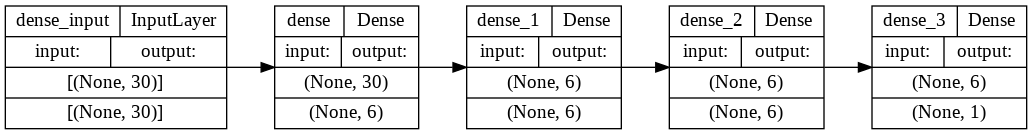

In [ ]:
keras.utils.plot_model(ann_clf, show_shapes=True, rankdir="LR")

In [ ]:
_, train_acc = ann_clf.evaluate(X_train, y_train, verbose=0)
_, val_acc = ann_clf.evaluate(X_val, y_val, verbose=0)
_, test_acc = ann_clf.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Validation: %.3f, Test: %.3f' % (train_acc, val_acc, test_acc))

Train: 0.914, Validation: 0.930, Test: 0.877


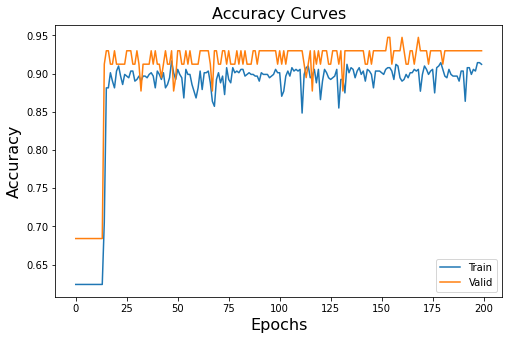

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(record.history['accuracy'], label='Train')
plt.plot(record.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

In [ ]:
# Experiment with different batch size



In [ ]:
# Experiment with different EPOCHs



In [ ]:
# Experiment with early stopping



### Ensemble Learning

Library: Scikit-learn, Keras, Tensorflow

In [ ]:
display(models)

,model_name,model,parameters
0,rnd_clf0,"(DecisionTreeClassifier(max_features='auto', r...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
1,rnd_clf1,"(DecisionTreeClassifier(max_features='auto', r...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
2,rnd_clf2,"(DecisionTreeClassifier(max_features='auto', r...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
3,tree_clf0,DecisionTreeClassifier(random_state=10),"{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
4,tree_clf1,"DecisionTreeClassifier(criterion='entropy', ra...","{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
5,tree_clf2,"DecisionTreeClassifier(random_state=10, splitt...","{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
6,svc_clf0,SVC(random_state=10),"{'C': 1.0, 'break_ties': False, 'cache_size': ..."
7,svc_clf1,"SVC(kernel='sigmoid', random_state=10)","{'C': 1.0, 'break_ties': False, 'cache_size': ..."
8,svc_clf2,"SVC(kernel='linear', random_state=10)","{'C': 1.0, 'break_ties': False, 'cache_size': ..."
9,log_clf0,"LogisticRegression(n_jobs=-1, random_state=10)","{'C': 1.0, 'class_weight': None, 'dual': False..."


In [ ]:
display(models_eval)

,model_name,confusion_matrix,recall,f1_score,roc_auc_score
0,rnd_clf0,"[16, 2, 1, 38]",0.974359,0.962025,0.931624
1,rnd_clf1,"[17, 1, 0, 39]",1.000000,0.987342,0.972222
2,rnd_clf2,"[17, 1, 0, 39]",1.000000,0.987342,0.972222
3,tree_clf0,"[15, 3, 2, 37]",0.948718,0.936709,0.891026
4,tree_clf1,"[15, 3, 2, 37]",0.948718,0.936709,0.891026
5,tree_clf2,"[17, 1, 0, 39]",1.000000,0.987342,0.972222
6,svc_clf0,"[13, 5, 0, 39]",1.000000,0.939759,0.861111
7,svc_clf1,"[5, 13, 17, 22]",0.564103,0.594595,0.420940
8,svc_clf2,"[16, 2, 1, 38]",0.974359,0.962025,0.931624
9,log_clf0,"[15, 3, 1, 38]",0.974359,0.950000,0.903846


In [ ]:
from sklearn.ensemble import VotingClassifier

# Retrain top 3 models using their parameters specifically

# Temp code
ens_clf = VotingClassifier(
    estimators=[('rf', rnd_clf), ('tf', tree_clf), ('svc', svc_clf)],
    voting='hard',
    n_jobs = -1)

ens_clf.fit(X_train, y_train)


# y_pred = ens_clf.predict(X_val)
# print(y_pred)

# accuracy_train = round(ens_clf.score(X_train, y_train)*100,2)
# print(round(accuracy_train, 2), '%')

# accuracy_test = round(ens_clf.score(X_test, y_test)*100,2)
# print(round(accuracy_test, 2), '%')

# accuracy_val = round(ens_clf.score(X_val, y_val)*100,2)
# print(round(accuracy_val, 2), '%')

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1]
100.0 %
98.25 %
96.49 %


## Model Testing

Identifying the best model (when considering their best parameters)

1.   Re-train models using both training and validation data
2.   Evaluate models using testing data



In [ ]:
X_train = np.concatenate((X_train, X_val), axis = 0)
y_train = np.concatenate((y_train, y_val), axis = 0)

In [ ]:
if len(X_train)==len(y_train) and len(X_test) == len(y_test):
  print("X and y data length matching")
else:
  print("Error in data pipeline")
print()
print("No. of training data = %d" % len(X_train))
print("No. of testing data = %d" % len(X_test))

X and y data length matching

No. of training data = 512
No. of testing data = 57


### Random Forest Classifier

### Decision Tree


### Support Vector Machine (SVM)

### Logistic Regression

### Naive Bayes

### K-Nearest Neighbor

### Gradient Boosting Classifier

### Artificial Neural Network

### Ensemble Learning

## Discussion & Conclusion

After model testing, the best model identified is ...